In [186]:
#import libraries
import string

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = (stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MarcusIkeda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [187]:
def open_file(text) :
    file_path = text
    file_obj = open(file_path)
    file_contents = file_obj.readlines()
    wordcounts(file_contents)

In [188]:
def wordcounts(file_contents) :
    file_contents_cleaned = [] # Creating an empty list to store the cleaned file contents
    for line in file_contents: #The variable 'line' has a single line at a time
        words = line.split() #  A list of words from each sentence
        cleaned_words = [word.strip(string.punctuation).lower() for word in words] # punctuations
        cleaned_line = " ".join(cleaned_words) + "\n"
        file_contents_cleaned.append(cleaned_line)
        
    words = [] # Creates the list of lower case words in the text

    for line in file_contents_cleaned :
        for word in line.split() :
            words.append(word) #adds to list from word in list
            
    global total_length #makes a length for the original file
    total_length = len(words)

    temp = [] # Restores the list of words back into the list words
    for word in words :
        if word not in stopwords :
            temp.append(word)
    words = temp  

    word_counts = {}
    for word in words : #Creates a dictionary for each unique word in word counts (+1 to current dict if already in the dictionary)
        if word in word_counts :
            word_counts[word] +=1
        else :
            word_counts[word] = 1
    explicit_pct(explicit_words, word_counts)   

In [189]:
def explicit_pct(explicit_words, word_counts):
    explicit_word_dict = {}
    length = len(explicit_words)

    for word in explicit_words :
        if word in word_counts :
            explicit_word_dict[word] = word_counts[word]
        else :
            explicit_word_dict[word] = 0
    words = explicit_word_dict
        
    frequent_word(words, length)


In [190]:
def frequent_word(words, length) :   # Sorts the list in order for barplot
    counts_list = list(words.items())
    counts_list_sorted = sorted(counts_list ,key=lambda x: x[1], reverse=True)
    e_w_length = counts_list_sorted[0:length]

    labels = []
    i = 0
    for item in e_w_length :
        labels.append(e_w_length[i][0])
        i += 1

    frequencies = []
    i = 0
    for item in e_w_length :
        frequencies.append(e_w_length[i][1])
        i += 1
        
    sum = 0
    for item in frequencies :
        sum = sum + item
        
    print("Percentage of explicit words = "+ str(sum/total_length * 100) + "%")
    print("Labels:", labels)
    print("Frequencies:", frequencies)
    
    plt.figure(figsize=(11,4))
    sns.set_context('paper')
    sns.set_style('darkgrid')
    sns.barplot(x = frequencies, y = labels, orient="h",edgecolor='black', width = 0.6,  ) #barplot settings

    plt.xlabel('Frequency of Word')
    plt.ylabel('Most Common Words')
    plt.title('Common Words')
    
    a = [labels, frequencies]
    return(a)

input file path
Files\E L James - 01 - Fifty Shades of Grey.txt
Percentage of explicit words = 0.1072777770465046%
Labels: ['call', 'sex']
Frequencies: [86, 77]
None


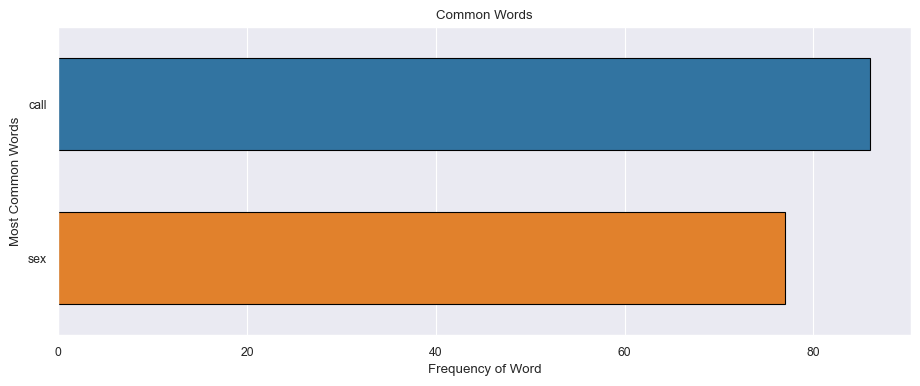

In [185]:
#import file and explicit words
global explicit_words
global text
explicit_words = ['call', 'sex']
print("input file path")
text = input()
open_file(text)







Percentage of explicit words = 0.5692961788050703%
Labels: ['feel', 'submissive', 'dominant', 'shit', 'crap', 'fuck', 'sex', 'sexual']
Frequencies: [257, 119, 117, 92, 92, 82, 77, 29]


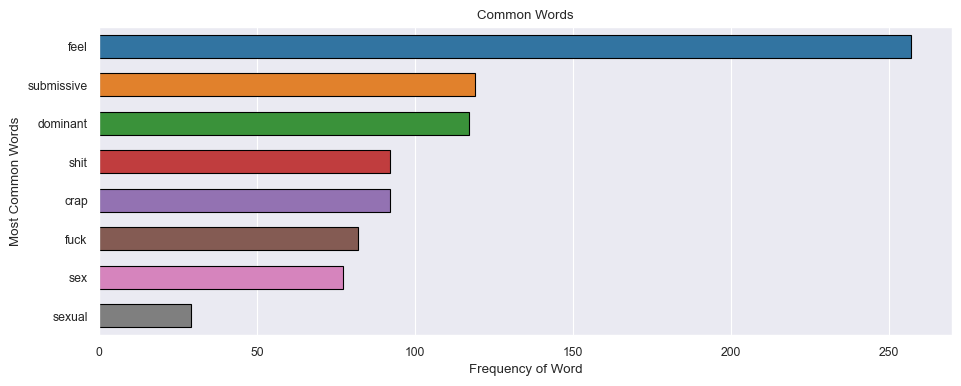

In [162]:
file_path = "Files\E L James - 01 - Fifty Shades of Grey.txt"
explicit_words = ['fuck','shit','sex','submissive','dominant','crap','feel','sexual']
file_obj = open(file_path)
file_contents = file_obj.readlines()
wordcounts(file_contents)

Percentage of explicit words = 0.5692961788050703%
Labels: ['feel', 'submissive', 'dominant', 'shit', 'crap', 'fuck', 'sex', 'sexual']
Frequencies: [257, 119, 117, 92, 92, 82, 77, 29]
Percentage of explicit words = 0.20468336602124496%


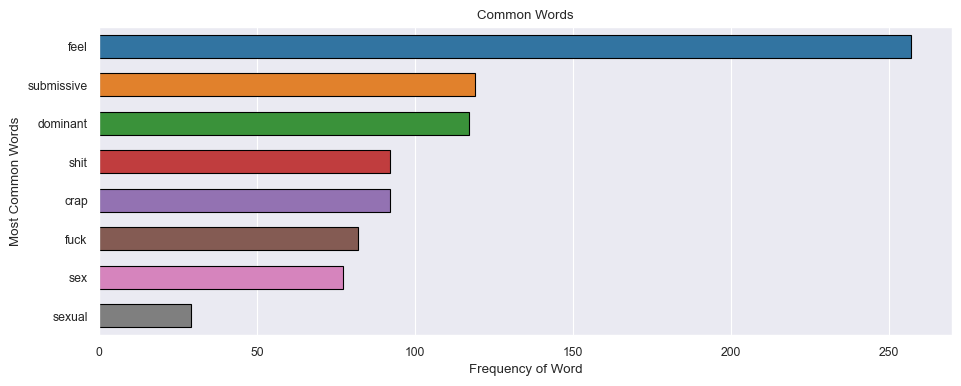

In [163]:
explicit_word_dict = {}
length = len(explicit_words)

for word in explicit_words :
    explicit_word_dict[word] = word_counts[word]
frequent_word(explicit_word_dict, length)
print("Percentage of explicit words = "+ str(sum/total_length * 100) + "%")
